### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')
print(df)

     OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0          1     역사책        Books         5  37000        1071  1980-08-08   
1          2      셔츠     Clothing         5  20000        1526  1967-08-09   
2          3     노트북  Electronics         4   8000        1252  1973-04-07   
3          4     자전거       Sports         1   8000        1670  1970-04-08   
4          5     헤드폰  Electronics         3  26000        1838  1992-05-19   
..       ...     ...          ...       ...    ...         ...         ...   
115      116   스마트워치  Electronics         1  33000        1508  1971-01-02   
116      117   스마트워치  Electronics         4  41000        1645  1975-03-15   
117      118     태블릿  Electronics         1  33000        1433  1965-02-01   
118      119     청바지     Clothing         2  43000        1497  1980-04-02   
119      120      과자         Food         1  48000        1951  1989-11-28   

            OrderDate Country  DiscountRate  
0    2024-06-10 1

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [11]:
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [12]:
# 1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
# - 매출액 = `Quantity` * `Price`
df['TotalRevenue'] = df['Quantity'] * df['Price']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09,78000
...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20,33000
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09,164000
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09,33000
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06,86000


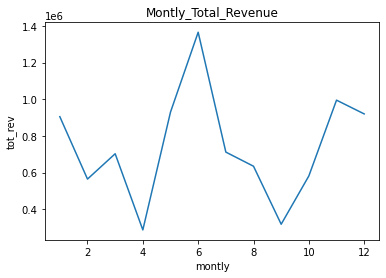

In [19]:
# 2. 월별 총 매출액을 집계하여 시각화하세요.
# - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
df.fillna(0)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Montly'] = df['OrderDate'].dt.month

mon_tot_rev = df.groupby('Montly')['TotalRevenue'].sum()

plt.figure()
plt.title("Montly_Total_Revenue")
plt.plot(mon_tot_rev.index, mon_tot_rev)
plt.xlabel("montly")
plt.ylabel("tot_rev")
plt.show()

In [ ]:
# 3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
top_seling = df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False)[:3]
top_seling

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

In [ ]:
# 4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.
country_tot_rev = df.groupby('Country').sum()['TotalRevenue'].sort_values(ascending=False)
country_tot_rev

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [30]:
# 1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
cst_tot_rev = df.groupby('CustomerID').sum()['TotalRevenue'].sort_values(ascending=False)[:5]
print(cst_tot_rev)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

In [35]:
# 2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
df.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)[:5]

CustomerID
1007    2
1141    2
1673    2
1508    2
1421    2
Name: Quantity, dtype: int64

In [ ]:
# 3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
#         - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [37]:
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue,Montly
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000,6
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000,11
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000,10
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000,7
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,0.20,33000,3
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,0.09,164000,1
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,0.09,33000,9
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,0.06,86000,6


In [39]:
# 1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
product_sale = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)[:5]
product_sale


Product
셔츠     25
립스틱    22
소설     21
역사책    20
커피     20
Name: Quantity, dtype: int64

In [41]:
# 2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.


In [ ]:
# 3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

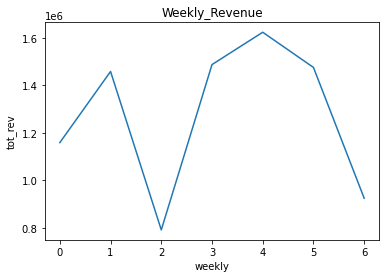

In [42]:
# 1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
df.fillna(0)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Weekly'] = df['OrderDate'].dt.weekday

week_tot_rev = df.groupby('Weekly')['TotalRevenue'].sum()

plt.figure()
plt.title("Weekly_Revenue")
plt.plot(week_tot_rev.index, week_tot_rev)
plt.xlabel("weekly")
plt.ylabel("tot_rev")
plt.show()

In [ ]:
# 2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.

In [ ]:
# 3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.